In [1]:
from transformers import BertTokenizer, TFAutoModel
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFAutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [2]:
import pandas as pd
sentiments_movie_train=pd.read_csv("/content/train.csv")
sentiments_movie_train

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [3]:
# Tokenize text data
tokenized_inputs = tokenizer(sentiments_movie_train["text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf")

In [ ]:
tokenized_inputs

{'input_ids': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[ 101, 2085, 1010, ..., 3932, 3632,  102],
       [ 101, 1996, 6517, ..., 2995, 3255,  102],
       [ 101, 2197, 2305, ..., 6045, 2000,  102],
       ...,
       [ 101, 2034, 2023, ..., 9544, 4765,  102],
       [ 101, 2065, 2017, ..., 2000, 2293,  102],
       [ 101, 2004, 5875, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [6]:
# Count the number of unique labels
num_labels = len(sentiments_movie_train["sentiment"].unique())
num_labels

2

In [7]:
# Convert labels to TensorFlow tensors
import tensorflow as tf
# Convert labels to TensorFlow tensors
labels = tf.convert_to_tensor(sentiments_movie_train["sentiment"].values)

In [8]:
import numpy as np
# Convert labels to numerical values
label_map = {"neg": 0, "pos": 1}  # Mapping label strings to numerical values
labels = np.array([label_map[label] for label in sentiments_movie_train["sentiment"]])
labels


array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# Convert labels to TensorFlow tensors
labels = tf.convert_to_tensor(labels)

In [10]:
# Load pre-trained BERT model for sequence classification
from transformers import TFBertForSequenceClassification
# Load pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=len(label_map))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
# Define loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
# Define optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [13]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [14]:
# Train the model, fine tuning the pre-trained BERT model on movie review dataset:
history = model.fit(
    tokenized_inputs,
    labels,
    epochs=2,
    batch_size=32
)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
782/782 [==============================] - 762s 878ms/step - loss: 0.3411 - accuracy: 0.8470
Epoch 2/2
782/782 [==============================] - 684s 875ms/step - loss: 0.1904 - accuracy: 0.9264


In [15]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(tokenized_inputs, labels, verbose=1)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

782/782 [==============================] - 240s 294ms/step - loss: 0.0763 - accuracy: 0.9753
Training Loss: 0.0763
Training Accuracy: 0.9753


In [16]:
# Load the test data
sentiments_movie_test = pd.read_csv("/content/test.csv")

# Tokenize the test data
tokenized_test_inputs = tokenizer(sentiments_movie_test["text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf")

# Get the true labels for the test data
test_labels = np.array([label_map[label] for label in sentiments_movie_test["sentiment"]])

# Make predictions on the test data
predictions = model.predict(tokenized_test_inputs)
predicted_labels = np.argmax(predictions.logits, axis=1)

# Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

782/782 [==============================] - 238s 294ms/step
Test Accuracy: 0.8678
Precision: 0.8984
Recall: 0.8295
F1-score: 0.8626


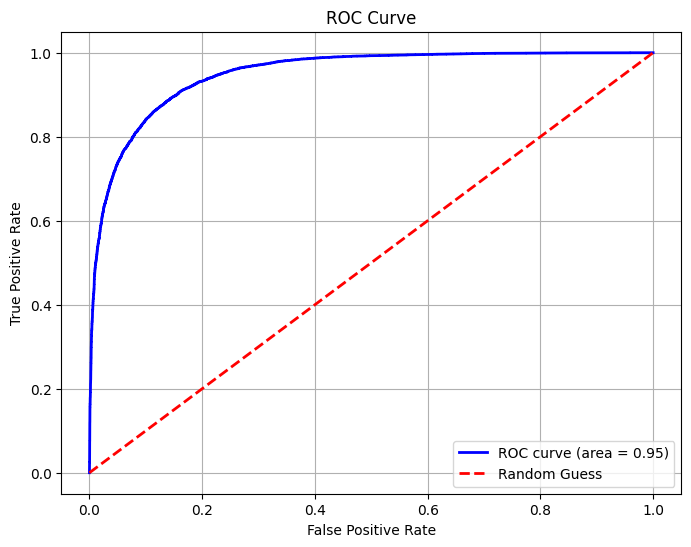

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities
predicted_probabilities = tf.nn.softmax(predictions.logits, axis=1)[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(test_labels, predicted_probabilities)

# Compute ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
# Define additional movie review texts
movie_reviews = [
    "This movie was terrible, I regret watching it.",
    "The acting was mediocre and the plot was confusing.",
    "I couldn't wait for this movie to end, it was painfully boring.",
    "What a waste of time, I wouldn't recommend this movie to anyone.",
    "I was pleasantly surprised by how good this movie turned out to be."
]

# Tokenize the movie review texts
tokenized_reviews = tokenizer(movie_reviews, padding=True, truncation=True, max_length=128, return_tensors="tf")

# Make predictions on the movie review texts
review_predictions = model.predict(tokenized_reviews)

# Get the predicted labels
predicted_labels = np.argmax(review_predictions.logits, axis=1)

# Map the numerical labels back to the original sentiments
predicted_sentiments = [label_map_reverse[label] for label in predicted_labels]

# Print the predicted sentiments for each review
for review, sentiment in zip(movie_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

1/1 [==============================] - 0s 52ms/step
Review: This movie was terrible, I regret watching it.
Predicted Sentiment: neg

Review: The acting was mediocre and the plot was confusing.
Predicted Sentiment: neg

Review: I couldn't wait for this movie to end, it was painfully boring.
Predicted Sentiment: neg

Review: What a waste of time, I wouldn't recommend this movie to anyone.
Predicted Sentiment: neg

Review: I was pleasantly surprised by how good this movie turned out to be.
Predicted Sentiment: pos

